In [84]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [85]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [86]:
len(df_market_data.index)

41

In [87]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [88]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

### Prepare the Data

In [89]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
crypto_data_scaled = StandardScaler().fit_transform(df_market_data[["price_change_percentage_24h", "price_change_percentage_7d", "price_change_percentage_14d", "price_change_percentage_30d", "price_change_percentage_60d", "price_change_percentage_200d", "price_change_percentage_1y"]])

# Diplay the first five rows of the scaled data
crypto_data_scaled[0:5]

array([[ 0.50852937,  0.49319307,  0.77220043,  0.23545963, -0.0674951 ,
        -0.35595348, -0.25163688],
       [ 0.18544589,  0.93444504,  0.55869212, -0.05434093, -0.27348273,
        -0.11575947, -0.19935211],
       [ 0.02177396, -0.70633685, -0.02168042, -0.06103015,  0.00800452,
        -0.55024692, -0.28206051],
       [-0.04076438, -0.81092807,  0.24945797, -0.05038797, -0.37316402,
        -0.45825882, -0.29554614],
       [ 1.19303608,  2.00095907,  1.76061001,  0.54584206, -0.29120287,
        -0.49984776, -0.27031695]])

In [90]:
# Create a DataFrame with the scaled data
df_market_scaled = pd.DataFrame(crypto_data_scaled, columns=["price_change_percentage_24h", "price_change_percentage_7d", "price_change_percentage_14d", "price_change_percentage_30d", "price_change_percentage_60d", "price_change_percentage_200d", "price_change_percentage_1y"])

# Copy the crypto names from the original data
df_market_scaled['coin_id'] = df_market_data.index

# Set the coinid column as index
df_market_scaled.set_index("coin_id", inplace = True)

# Display sample data
df_market_scaled.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


### Find the Best Value for k Using the Original Data.

In [91]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 11))

In [92]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list
for i in k_values:
    k_model = KMeans(n_clusters=i, random_state=0)
    k_model.fit(df_market_scaled)
    inertia.append(k_model.inertia_)

In [93]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k_values, "inertia": inertia}
df_elbow_orig = pd.DataFrame(elbow_data)

# Review the DataFrame
df_elbow_orig.head()

,k,inertia
0,1,287.000000
1,2,195.820218
2,3,123.190482
3,4,79.022435
4,5,65.302379


In [94]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
df_elbow_orig.hvplot.line(
    x="k", 
    y="inertia", 
    title="Elbow Curve", 
    xticks=k_values
)

:Curve   [k]   (inertia)

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** 4

### Cluster Cryptocurrencies with K-means Using the Original Data

In [95]:
# Initialize the K-Means model using the best value for k
# Define the model with optimal number of clusters
model = KMeans(n_clusters=4, random_state=0)

In [96]:
# Fit the K-Means model using the scaled data
model.fit(df_market_scaled)

KMeans(n_clusters=4, random_state=0)

In [97]:
# Predict the clusters to group the cryptocurrencies using the scaled data
cluster_predictions = model.predict(df_market_scaled)

# Print the resulting array of cluster values.
cluster_predictions

array([0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 3, 0, 3, 3, 0, 3, 3, 0,
       3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 1, 0, 3, 3, 2, 3, 3, 3, 3],
      dtype=int32)

In [98]:
# Create a copy of the DataFrame
df_market_scaled_predictions = df_market_scaled.copy()

In [99]:
# Add a new column to the DataFrame with the predicted clusters
df_market_scaled_predictions['cluster'] = cluster_predictions

# Display sample data
df_market_scaled_predictions.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,0
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,0
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,3
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,3
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,0


In [100]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
df_market_scaled_predictions.hvplot.scatter(
    x="price_change_percentage_24h", 
    y="price_change_percentage_7d", 
    by="cluster",
    hover_cols='coin_id'
)

:NdOverlay   [cluster]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

### Optimize Clusters with Principal Component Analysis.

In [101]:
# Create a PCA model instance and set `n_components=3`.
pca=PCA(n_components=3)

In [102]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
crypto_pca = pca.fit_transform(df_market_scaled)

# Review the first 5 rows of the array of list data
crypto_pca[:5]

array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527]])

In [103]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
pca.explained_variance_ratio_

array([0.3719856 , 0.34700813, 0.17603793])

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** About 89%

In [104]:
# Create a new DataFrame with the PCA data.
crypto_pca_df = pd.DataFrame(
    crypto_pca,
    columns=["PCA1", "PCA2", "PCA3"]
)
crypto_pca_df.head()

# Copy the crypto names from the original data
crypto_pca_df['coin_id'] = df_market_data.index

# Set the coinid column as index
crypto_pca_df.set_index("coin_id", inplace = True)

# Display sample data
crypto_pca_df.head()


,PCA1,PCA2,PCA3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


### Find the Best Value for k Using the PCA Data

In [105]:
# Create a list with the number of k-values from 1 to 11
# Create a a list to store inertia values and the values of k
k_values = list(range(1, 11))

In [106]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list
for i in k_values:
    k_model = KMeans(n_clusters=i, random_state=0)
    k_model.fit(crypto_pca_df)
    inertia.append(k_model.inertia_)

In [107]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k_values, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow_pca = pd.DataFrame(elbow_data)

# Review the DataFrame
df_elbow_pca.head()

,k,inertia
0,1,256.874086
1,2,165.901994
2,3,93.774626
3,4,49.665497
4,5,37.878747


In [108]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
# Plot the DataFrame
df_elbow_pca.hvplot.line(
    x="k", 
    y="inertia", 
    title="Elbow Curve", 
    xticks=k_values
)

:Curve   [k]   (inertia)

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** It doesn't

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [109]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4)

In [110]:
# Fit the K-Means model using the PCA data
model.fit(crypto_pca_df)

KMeans(n_clusters=4)

In [111]:
# Predict the clusters to group the cryptocurrencies using the PCA data
crypto_clusters = model.predict(crypto_pca_df)

# Print the resulting array of cluster values.
print(crypto_clusters)

[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 1 2 0 0 3
 0 0 0 0]


In [112]:
# Create a copy of the DataFrame with the PCA data
df_crypto_pca_predictions = crypto_pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters
df_crypto_pca_predictions["clusters"] = crypto_clusters

# Display sample data
df_crypto_pca_predictions.head()

,PCA1,PCA2,PCA3,clusters
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,2
ethereum,-0.458261,0.458466,0.952877,2
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,2


In [113]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
df_crypto_pca_predictions.hvplot.scatter(
    x="PCA1",
    y="PCA2",
    by="clusters",
    hover_cols='coin_id',
    title = "Scatter Plot by Crypto Segment - PCA=3"
)

:NdOverlay   [clusters]
   :Scatter   [PCA1]   (PCA2,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

<AxesSubplot:title={'center':'PCA Elbow Curve'}, xlabel='k'>

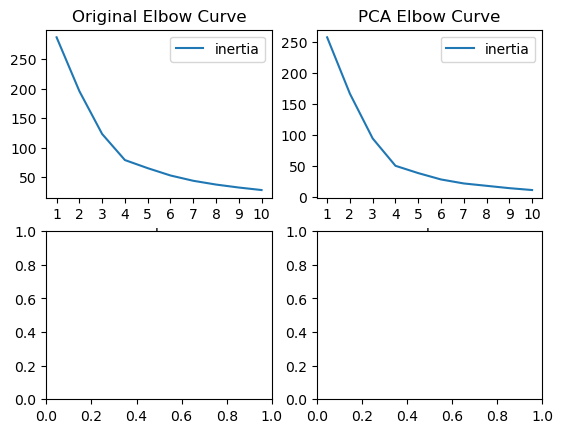

In [129]:
#define subplot layout
fig, axes = plt.subplots(nrows=2, ncols=2)

#add DataFrames to subplots
df_elbow_orig.plot(
    kind='line',
    x="k", 
    y="inertia", 
    title="Original Elbow Curve", 
    xticks=k_values,
    ax=axes[0,0]
)
df_elbow_pca.plot(
    kind="line",
    x="k", 
    y="inertia", 
    title="PCA Elbow Curve", 
    xticks=k_values,
    ax=axes[0,1]
)

In [31]:
# Composite plot to contrast the clusters
# YOUR CODE HERE!

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** 